<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reducing the network's size

In [5]:
# Original movie-review classification model: 

from tensorflow.keras.datasets import imdb 
from tensorflow import keras 
from tensorflow.keras import layers 
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results 

train_data = vectorize_sequence(train_data)

model = keras.Sequential ([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_original = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, 
                             validation_split=0.4)




Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5021 - accuracy: 0.7865 - val_loss: 0.3724 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2940 - accuracy: 0.9065 - val_loss: 0.3184 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2154 - accuracy: 0.9287 - val_loss: 0.2967 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1699 - accuracy: 0.9443 - val_loss: 0.2749 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1390 - accuracy: 0.9562 - val_loss: 0.2838 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.2948 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0947 - accuracy: 0.9728 - val_loss: 0.3212 - val_accuracy: 0.8823
Epoch 8/20
30

In [ ]:
# Version of the model with lower capacity: 

model = keras.Sequential([ 
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, 
    validation_split=
)

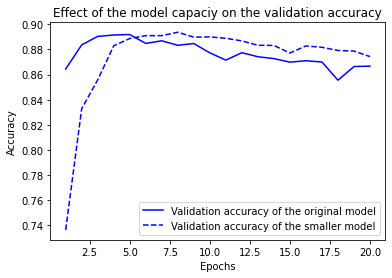

In [ ]:
# Plotting a validation accuracy comparison:

import matplotlib.pyplot as plt 

val_acc_original = history_original.history['val_accuracy']
val_acc_smaller = history_smaller_model.history['val_accuracy']
epochs = range(1, 21)

plt.plot(epochs, val_acc_original, "b-", label='Validation accuracy of the original model')
plt.plot(epochs, val_acc_smaller, "b--", label='Validation accuracy of the smaller model')
plt.title("Effect of the model capaciy on the validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

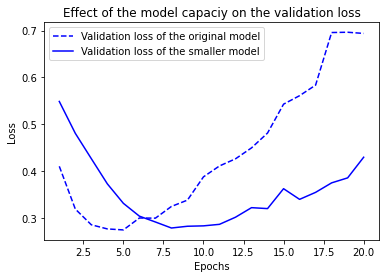

In [ ]:
# Plotting a validation loss comparison:

import matplotlib.pyplot as plt 

val_loss_original = history_original.history['val_loss']
val_loss_smaller = history_smaller_model.history['val_loss']
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b--", label='Validation loss of the original model')
plt.plot(epochs, val_loss_smaller, "b-", label='Validation loss of the smaller model')
plt.title("Effect of the model capaciy on the validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

# The smaller model starts overfitting later than the reference original model, 
# and its performance degrades more slowly once it starts overfitting. 

In [ ]:
# Version of the model with higher capacity:

model = keras.Sequential([ 
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, 
    validation_split=0.4
)


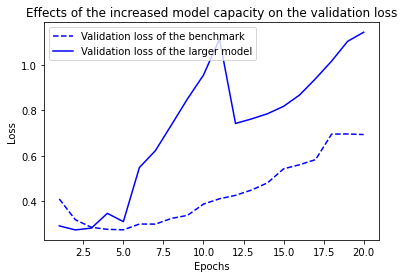

In [ ]:
# Plotting a validation loss comparison between the benchmark and the model with increased capacity:

val_loss_original = history_original.history['val_loss']
val_loss_larger = history_larger_model.history['val_loss']
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b--", label="Validation loss of the benchmark")
plt.plot(epochs, val_loss_larger, "b-", label="Validation loss of the larger model")
plt.title("Effects of the increased model capacity on the validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# The bigger model starts overfitting almost from the 2nd epoch with very hight amplitude.
# The validation loss for is much noisier. 
# The more capacity the model has, the more quickly it can model the training data 
# with low training loss. 
# It is also more susceptible to overfitting. 

### Weight Regularization 

In [ ]:
# To mitigate overfitting we can alos put constraints on the complexity of a model 
# by forcing its weights to take only small values = weight regularization:
# we add the loss function of a model a cost associated with having large weights. 

# L1 regularization: cost is proportional to the absolte value of the weight coefficients (L1 norm).
# L2 regularization: cost is proportianal to the square of the value of weight coefficients (L2 norm). 
# L2 reg = weight decay (in the context of neural networks)

from tensorflow.keras import regularizers 

model = keras.Sequential([ 
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, 
    validation_split=0.4
)

# l2(0.002) means that every coefficient in the weight matrix of the layer will 
# add 0.002 * weight_coefficient_value ** 2 to the total loss of the model. 
# This penalty is only added at training time. 

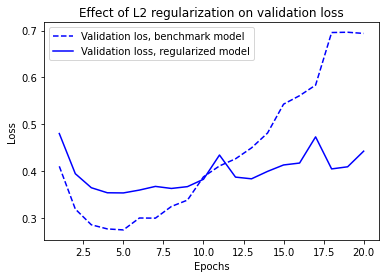

In [ ]:
# Validation loss comparison between the benchmark and the regularized model:

val_loss_original = history_original.history['val_loss']
val_loss_reg = history_l2_reg.history['val_loss']
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b--", label="Validation los, benchmark model")
plt.plot(epochs, val_loss_reg, "b-", label="Validation loss, regularized model")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# The model with L2 regularization is more resistant to overfitting than the reference model, 
# though both models have the same number of parameters (the same capacity). 

In [ ]:
# Different weight regularizers available in Keras: 

from tensorflow.keras import regularizers 

regularizers.l1(0.001) # L1 regularization
regularizers.l1_l2(l1=0.001, l2=0.001)  # Simultaneous L1 and L2 regularizations

### Adding Dropout

In [ ]:
# Weight regularization is mostly used fro smaller DL models. 
# Large DL models have too many parameters and so the costraints on weight values
# don't have much impact on model capacity and generaization. 

# Drop out, applied to a layer, consists of randomly dropping out(setting to zero)
# a number of output features fo the layer during trainig. 
# The dropout rate is the fraction of the features that are zeroed out
# (usually set between 0.2 and 0.5).
# At test time, no units are dropped out,
# but the layer's output values are scaled down by a factor equal to the dropout rate.

# Exaple: at training time drop out 50% of the units in the output
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)

# At test time, scale down the output by the dropout rate (by 0.5 since we previously droped half the units):
layer_output = *= 0.5

# We can also do both operations at training time,
# leaving the output unchanged at test time: 
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5 #  scale up rather than scale down 


In [3]:
# Adding dropout to the IMDB model: 

from tensorflow.keras.datasets import imdb 
from tensorflow import keras 
from tensorflow.keras import layers 
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results 

train_data = vectorize_sequence(train_data)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
model = keras.Sequential([ 
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_dropout = model.fit(
    train_data, train_labels, 
    epochs=20, batch_size=512, 
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 4s 66ms/step - loss: 0.6341 - accuracy: 0.6411 - val_loss: 0.5290 - val_accuracy: 0.8501
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5154 - accuracy: 0.7737 - val_loss: 0.4300 - val_accuracy: 0.8694
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4320 - accuracy: 0.8270 - val_loss: 0.3702 - val_accuracy: 0.8682
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3747 - accuracy: 0.8591 - val_loss: 0.3165 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3312 - accuracy: 0.8787 - val_loss: 0.2974 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2894 - accuracy: 0.8991 - val_loss: 0.2929 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2620 - accuracy: 0.9125 - val_loss: 0.2863 - val_accuracy: 0.8863
Epoch 8/20
30

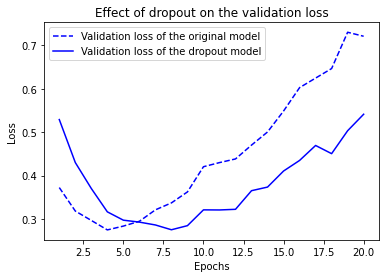

In [7]:
# Validation loss comparison between the original model and dropout modfication:

import matplotlib.pyplot as plt 

val_loss_original = history_original.history['val_loss']
val_loss_dropout = history_dropout.history['val_loss']
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b--", label='Validation loss of the original model')
plt.plot(epochs, val_loss_dropout, "b-", label='Validation loss of the dropout model')
plt.title("Effect of dropout on the validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

